# Daten importieren


In [24]:
import pandas as pd

df = pd.read_csv("salary.csv")
df

,Ausbildung,Berufserfahrung,Jahresgehalt
0,3,3,33646.62
1,1,3,36752.26
2,2,2,33306.56
3,4,20,59527.01
4,1,6,25876.54
5,1,9,44729.77
6,1,15,47127.23
7,4,2,29021.17
8,3,11,38836.08
9,4,8,43833.88


# Daten visualisieren

Text(0.5, 0, 'Jahresgehalt')

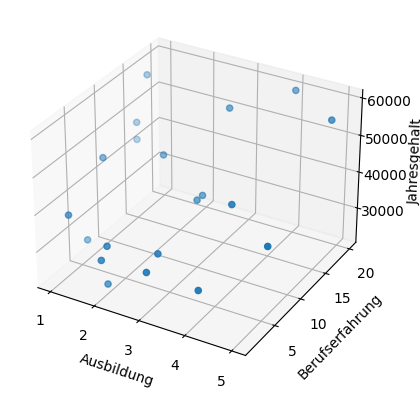

In [25]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(df['Ausbildung'], df['Berufserfahrung'], df['Jahresgehalt'])

ax.set_xlabel('Ausbildung')
ax.set_ylabel('Berufserfahrung')
ax.set_zlabel('Jahresgehalt')

# Daten aufteilen

In [26]:
X = df[['Ausbildung', 'Berufserfahrung']]
y = df["Jahresgehalt"]

In [28]:
y

0     33646.62
1     36752.26
2     33306.56
3     59527.01
4     25876.54
5     44729.77
6     47127.23
7     29021.17
8     38836.08
9     43833.88
10    45157.57
11    22934.17
12    56272.68
13    57819.75
14    39051.94
15    57174.74
16    42391.49
17    31405.02
18    30836.69
19    38836.24
Name: Jahresgehalt, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [29]:
X_train

,Ausbildung,Berufserfahrung
16,1,15
15,5,18
2,2,2
4,1,6
9,4,8
10,2,12
18,2,1
11,2,2
14,5,6
0,3,3


In [30]:
y_train

16    42391.49
15    57174.74
2     33306.56
4     25876.54
9     43833.88
10    45157.57
18    30836.69
11    22934.17
14    39051.94
0     33646.62
12    56272.68
13    57819.75
19    38836.24
17    31405.02
8     38836.08
1     36752.26
Name: Jahresgehalt, dtype: float64

# Modell trainieren

In [31]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Vorhersage

In [32]:
X_test

,Ausbildung,Berufserfahrung
3,4,20
6,1,15
7,4,2
5,1,9


In [33]:
y_predict = model.predict(X_test)
y_predict

array([59160.89503664, 47718.03024748, 32314.59665402, 38769.26411994])

# Modellbewertung (Mean Absolute Error)

In [35]:
y_test

3    59527.01
6    47127.23
7    29021.17
5    44729.77
Name: Jahresgehalt, dtype: float64

In [36]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_predict, y_test)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 2552.7119362303138


# Modellparameter

In [37]:
model.coef_

array([1328.51989429, 1491.46102126])

In [38]:
m_1, m_2 = model.coef_
c = model.intercept_

print(f"m1: {m_1}, m2: {m_2}, c: {c}")

m1: 1328.5198942945715, m2: 1491.4610212565622, c: 24017.59503433206


In [39]:
print("Vorhersage für Ausbildung=4 und Berufserfahrung=20: ", m_1 * 4 + m_2 * 20 + c)

Vorhersage für Ausbildung=4 und Berufserfahrung=20:  59160.89503664159


# Modell visualisieren


In [41]:
import numpy as np

X_1, X_2 = np.meshgrid(range(0, 6), range(0, 21))
yy = m_1 * X_1 + m_2 * X_2 + c

Text(0.5, 0, 'Jahresgehalt')

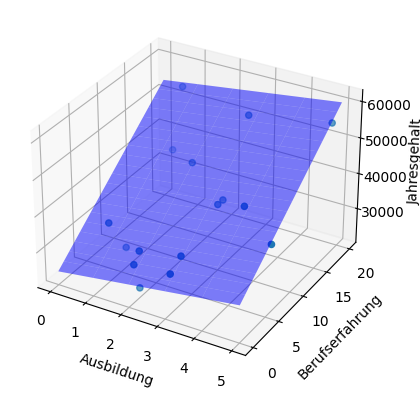

In [42]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X_train['Ausbildung'], X_train['Berufserfahrung'], y_train)
ax.plot_surface(X_1, X_2, yy, color='blue', alpha=0.5)

ax.set_xlabel('Ausbildung')
ax.set_ylabel('Berufserfahrung')
ax.set_zlabel('Jahresgehalt')